# Create Analytical Data
This notebook covers the loading of the various data collected in order to build a forecasting model for contraceptive medical products order in Cote d'Ivoire. The data is loaded into a postgres database. The data is then explored to determine how the data can be appropropriately merged to facilitate future analytical work including exploratory data analysis, model development and data visualization.

In [2]:
import os

import pandas as pd
import numpy as np

In [3]:
%matplotlib inline

In [4]:
# Primary Dataset
lc_data = pd.read_csv("final_data/contraceptive_logistics_data.csv")
lcd_date_dict = dict(year = lc_data.year,
                     month = lc_data.month,
                     day = [28]*len(lc_data))
lc_data['year_month']  = pd.to_datetime(lcd_date_dict)
lc_data.to_csv("lc_data.csv",index=False)
lc_data.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,year_month
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0,2019-01-28
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0,2019-01-28
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0,2019-01-28
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0,2019-01-28
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0,2019-01-28


In [5]:
ccm_data = pd.read_csv("final_data/contraceptive_case_data_monthly.csv")
ccm_date_dict = dict(year = ccm_data.year,
                     month = ccm_data.month,
                     day = [28]*len(ccm_data))
ccm_data['year_month']  = pd.to_datetime(ccm_date_dict)
ccm_data.to_csv("ccm_data.csv",index=False)
ccm_data.head()

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,...,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end,year_month
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,...,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0,2019-01-28
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,...,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0,2019-02-28
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,...,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0,2019-03-28
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,...,217.0,55.0,824.0,1787.0,NaN,340.0,NaN,889.0,2727.0,2019-04-28
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,...,321.0,256.0,1032.0,1635.0,NaN,355.0,NaN,604.0,1668.0,2019-05-28


In [6]:
cca_data = pd.read_csv("final_data/contraceptive_case_data_annual.csv")
cca_data.head()

,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,...,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,...,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,...,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,...,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,...,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,...,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0


In [7]:
site_data = pd.read_csv("final_data/service_delivery_site_data.csv")
site_data.head()

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


In [8]:
product_data = pd.read_csv("final_data/product.csv")
product_data.head()

,product_code,product_type,product_name
0,AS17005,Female Condom,PRESERVATIF FEMININ UNITE
1,AS46000,Male Condom,PRESERVATIF MASCULIN BTE/144 BOITE
2,AS27139,Emergency Contraceptive (Pill),LEVONORGESTREL 1.5 MG CP BOITE
3,AS27137,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE
4,AS27138,Contraceptive Implant,IMPLANON IMPLANT 68 MG BTE/1 BOITE


In [9]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
load_dotenv()

True

In [10]:
def get_posgres_connection():
    db_name = os.getenv("PSQL_DB_NAME")
    db_user = os.getenv("PSQL_DB_USER")
    db_password = os.getenv("PSQL_DB_PASSWORD")
    db_host = os.getenv("PSQL_DB_HOST")
    sql_engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:5432/{db_name}')
    return sql_engine


In [11]:
?lc_data.to_sql

### Load data to the database 

In [12]:
# Create db engine
psql_engine = get_posgres_connection()

# ci_logistics_contraceptive_cases
lc_data.to_sql('ci_logistics_contraceptive_cases', psql_engine, index=False,if_exists='replace')

# ci_monthly_cases
ccm_data.to_sql('ci_monthly_cases', psql_engine, index=False,if_exists='replace')

# ci_annual_cases
cca_data.to_sql('ci_annual_cases', psql_engine, index=False,if_exists='replace')

# ci_med_products
product_data.to_sql('ci_med_products', psql_engine, index=False,if_exists='replace')

# ci_med_sites
site_data.to_sql('ci_med_sites', psql_engine, index=False,if_exists='replace')

KeyboardInterrupt: 

#### Load spatial data to the database

##### Get SRID

In [13]:
from osgeo import ogr
driver = ogr.GetDriverByName('ESRI Shapefile')
shape = driver.Open('civ_admbnda_adm3_cntig_ocha_itos_20180706/civ_admbnda_adm3_cntig_ocha_itos_20180706.shp')
layer= shape.GetLayer()
# the crs
crs = layer.GetSpatialRef()

# from Geometry
feature = layer.GetNextFeature()
geom = feature.GetGeometryRef()
print(crs)

GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AXIS["Longitude",EAST],
    AUTHORITY["EPSG","4326"]]


In [14]:
# Imports
from geoalchemy2 import Geometry, WKTElement
from sqlalchemy import *
import pandas as pd
import geopandas as gpd

In [15]:
def load_shape_file_to_db(shape_file,table,engine,geom_type ='MULTIPOLYGON',if_exists ='replace',srid = 4326):
    """
    This function will load a shape file to a PostGIS database system.
    shape_file str: path to shapefile
    table str:name of database file to load to POSTGIS
    engine sqlalchemy.Engine: A sqlAlchemy POSTGIS Engine Object
    if_exists str: method of upload to database, default is "replace"
    srid int: format ID of shape files, this can be discovered by using the
    
    """
    # Load shape file with geopandas
    gdf = gpd.read_file(shape_file)

    #Convert geometry column to WKTElement
    gdf['geom'] = gdf['geometry'].apply(lambda x: WKTElement(x.wkt, srid= 4326))


    #drop the geometry column as it is now duplicative
    gdf.drop('geometry', 1, inplace=True)

    # Use 'dtype' to specify column's type
    # For the geom column, we will use GeoAlchemy's type 'Geometry'
    gdf.to_sql(table, engine, if_exists= if_exists, index=False, 
                             dtype={'geom': Geometry(geom_type, srid= 4326)})
    return None

In [ ]:
# district

#Establish a postgres connection
psql_engine = get_posgres_connection()


load_shape_file_to_db('civ_admbnda_adm3_cntig_ocha_itos_20180706/civ_admbnda_adm3_cntig_ocha_itos_20180706.shp',
                      "cdi_shp_adm3",
                      psql_engine,
                      geom_type="POLYGON")

In [16]:
gdf = gpd.read_file('civ_admbnda_adm3_cntig_ocha_itos_20180706/civ_admbnda_adm3_cntig_ocha_itos_20180706.shp')

gdf.head()

,Shape_Leng,Shape_Area,ADM3_FR,ADM3_PCODE,ADM3_REF,ADM3ALT1FR,ADM3ALT2FR,ADM2_FR,ADM2_PCODE,ADM1_FR,ADM1_PCODE,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,1.193760,0.061911,Abengourou,CI200101,None,None,None,Abengourou,CI2001,Indenie-Djuablin,CI20,Côte d'Ivoire,CI,2011-12-24,2018-07-06,None,"POLYGON ((-3.70082 6.77977, -3.69775 6.77833, ..."
1,1.045872,0.045117,Abidjan,CI010101,None,None,None,Abidjan,CI0101,District Autonome D'Abidjan,CI01,Côte d'Ivoire,CI,2011-12-24,2018-07-06,None,"POLYGON ((-3.96967 5.46470, -3.96803 5.46311, ..."
2,1.097566,0.042344,Abigui,CI270201,None,None,None,Dimbokro,CI2702,N'Zi,CI27,Côte d'Ivoire,CI,2011-12-24,2018-07-06,None,"POLYGON ((-4.84054 6.86701, -4.81972 6.88024, ..."
3,1.360062,0.052789,Aboisso,CI300101,None,None,None,Aboisso,CI3001,Sud-Comoe,CI30,Côte d'Ivoire,CI,2011-12-24,2018-07-06,None,"POLYGON ((-3.31306 5.63700, -3.31242 5.63626, ..."
4,0.712925,0.018852,Aboisso-Comoé,CI240301,Aboisso-Comoe,None,None,Alépé,CI2403,Me,CI24,Côte d'Ivoire,CI,2011-12-24,2018-07-06,None,"POLYGON ((-3.42471 5.74856, -3.42353 5.74838, ..."


###  Lets start exploring the data to make an analytical dataset

In [17]:
districts = site_data['site_district'].unique()
print(len(districts))
districts.sort()
districts

81


array(['ABENGOUROU', 'ABOBO-EST', 'ABOISSO', 'ADIAKE',
       'ADJAME-PLATEAU-ATTECOUBE', 'ADZOPE', 'AGBOVILLE', 'AGNIBILEKROU',
       'AKOUPE', 'ALEPE', 'ANYAMA', 'BANGOLO', 'BEOUMI', 'BETTIE',
       'BIANKOUMA', 'BLOLEQUIN', 'BOCANDA', 'BONDOUKOU', 'BONGOUANOU',
       'BOUAFLE', 'BOUAKE NORD-OUEST', 'BOUNA', 'BOUNDIALI',
       'COCODY-BINGERVILLE', 'DABAKALA', 'DABOU', 'DALOA', 'DANANE',
       'DAOUKRO', 'DIDIEVI', 'DIMBOKRO', 'DIVO', 'DUEKOUE',
       'FERKESSEDOUGOU', 'FRESCO', 'GAGNOA', 'GRAND-BASSAM',
       'GRAND-LAHOU', 'GUEYO', 'GUIGLO', 'GUITRY', 'ISSIA', 'JACQUEVILLE',
       'KATIOLA', 'KORHOGO', 'KORO', 'KOUIBLY',
       'KOUMASSI-PORT BOUET-VRIDI', 'LAKOTA', "M'BAHIAKRO", 'MAN',
       'MANKONO', 'MINIGNAN', 'NASSIAN', 'NIAKARAMADOUGOU', 'ODIENNE',
       'OUANGOLO', 'OUME', 'PRIKRO', 'SAKASSOU', 'SAN PEDRO', 'SASSANDRA',
       'SEGUELA', 'SIKENSI', 'SINFRA', 'SOUBRE', 'TABOU', 'TANDA',
       'TENGRELA', 'TIASSALE', 'TIEBISSOU', 'TOUBA', 'TOULEPLEU',
       'TOUMO

In [20]:
site_data.head()

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


'ABOBO-EST' is a neighborhood in Abidjan

Match city to district then aggregate the district level.

Need to do some manual analysis to figure this whole matching up.

In [22]:
# Each city should be rolled-up into a district
region = gdf['ADM1_FR'].unique()
print(len(region))
region.sort()
region

33


array(['Agneby-Tiassa', 'Bafing', 'Bagoue', 'Belier', 'Bere', 'Bounkani',
       'Cavally', "District Autonome D'Abidjan",
       'District Autonome De Yamoussoukro', 'Folon', 'Gbeke', 'Gbokle',
       'Goh', 'Gontougo', 'Grands Ponts', 'Guemon', 'Hambol',
       'Haut-Sassandra', 'Iffou', 'Indenie-Djuablin', 'Kabadougou',
       'Loh-Djiboua', 'Marahoue', 'Me', 'Moronou', "N'Zi", 'Nawa', 'Poro',
       'San Pedro', 'Sud-Comoe', 'Tchologo', 'Tonkpi', 'Worodougou'],
      dtype=object)

In [18]:
districts = gdf['ADM2_FR'].unique()
print(len(districts))
districts.sort()
districts

108


array(['Abengourou', 'Abidjan', 'Aboisso', 'Adiaké', 'Adzopé',
       'Agboville', 'Agnibilékrou', 'Akoupé', 'Alépé', 'Arrah',
       'Attiégouakro', 'Bangolo', 'Biankouma', 'Bloléquin', 'Bocanda',
       'Bondoukou', 'Bongouanou', 'Botro', 'Bouaflé', 'Bouaké', 'Bouna',
       'Boundiali', 'Buyo', 'Béoumi', 'Béttié', 'Dabakala', 'Dabou',
       'Daloa', 'Danané', 'Daoukro', 'Dianra', 'Didievi', 'Dikodougou',
       'Dimbokro', 'Divo', 'Djekanou', 'Doropo', 'Duékoué', 'Facobly',
       'Ferkessédougou', 'Fresco', 'Gagnoa', 'Gbeleban', 'Grand-Bassam',
       'Grand-Lahou', 'Guiglo', 'Guitry', 'Guéyo', 'Issia', 'Jacqueville',
       'Kani', 'Kaniasso', 'Katiola', 'Kong', 'Korhogo', 'Koro',
       'Kouassi-Kouassikro', 'Kouibly', 'Koun Fao', 'Kounahiri', 'Kouto',
       'Lakota', "M'Bahiakro", "M'Batto", "M'Bengué", 'Madinani', 'Man',
       'Mankono', 'Minignan', 'Méagui', 'Nassian', 'Niakaramandougou',
       'Odienne', 'Ouangolodougou', 'Ouaninou', 'Oumé', 'Prikro',
       'Sakassou', '

In [19]:
site_data['site_code'].head()

0    C1399
1    C4001
2    C1004
3    C4002
4    C2002
Name: site_code, dtype: object

In [20]:
gdf['ADM2_PCODE'].head()

0    CI2001
1    CI0101
2    CI2702
3    CI3001
4    CI2403
Name: ADM2_PCODE, dtype: object

### The codes are not matching up between the two dataframes
- On inspection we can see there is an I missing, lets try tp add that and see if that fixes thing

In [21]:
# Insert String
ins_char = lambda x: x[0:1]+"I"+x[1:]
site_data['ADM2_PCODE'] = site_data['site_code'].apply(ins_char)

In [22]:
len(site_data)

156

In [23]:
len(gdf)

510

#### Lets merge the two dataframes and see the overlap

In [24]:
mgdf = gdf.merge(site_data, on = "ADM2_PCODE")
print( len(mgdf) )
mgdf.head()

32


,Shape_Leng,Shape_Area,ADM3_FR,ADM3_PCODE,ADM3_REF,ADM3ALT1FR,ADM3ALT2FR,ADM2_FR,ADM2_PCODE,ADM1_FR,...,date,validOn,validTo,geometry,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,1.360062,0.052789,Aboisso,CI300101,None,None,None,Aboisso,CI3001,Sud-Comoe,...,2011-12-24,2018-07-06,None,"POLYGON ((-3.31306 5.63700, -3.31242 5.63626, ...",C3001,Health Center,PORO-TCHOLOGO-BAGOUE,OUANGOLO,10.198892,-5.624077
1,0.924097,0.031886,Adaou,CI300102,None,None,None,Aboisso,CI3001,Sud-Comoe,...,2011-12-24,2018-07-06,None,"POLYGON ((-3.28207 5.34173, -3.28151 5.33991, ...",C3001,Health Center,PORO-TCHOLOGO-BAGOUE,OUANGOLO,10.198892,-5.624077
2,0.665830,0.020448,Adjouan,CI300103,None,None,None,Aboisso,CI3001,Sud-Comoe,...,2011-12-24,2018-07-06,None,"POLYGON ((-3.11982 5.37163, -3.11649 5.36952, ...",C3001,Health Center,PORO-TCHOLOGO-BAGOUE,OUANGOLO,10.198892,-5.624077
3,0.977936,0.038847,Ayamé,CI300104,Ayame,None,None,Aboisso,CI3001,Sud-Comoe,...,2011-12-24,2018-07-06,None,"POLYGON ((-3.17386 5.75005, -3.19768 5.70888, ...",C3001,Health Center,PORO-TCHOLOGO-BAGOUE,OUANGOLO,10.198892,-5.624077
4,1.023514,0.044338,Bianouan,CI300105,None,None,None,Aboisso,CI3001,Sud-Comoe,...,2011-12-24,2018-07-06,None,"POLYGON ((-3.17610 6.24681, -3.15693 6.24367, ...",C3001,Health Center,PORO-TCHOLOGO-BAGOUE,OUANGOLO,10.198892,-5.624077


#### Analysis
The dataframes are not able to merged. We would like to be able to do additional analysis on the sites based on their regional geographic characteristics but currently the data does not support their merging.

## Next Steps - Questions?
- How can we merge the data we have available into a single dataset?
- What transformations and processing stems should we make on the data prior to loading into our database?
- What analytical transformations on the data should we make prior to modeling of the data?

In [ ]:
- timeseries data is not symmetrical
- We need to write our own algorithm to handle the calculation of lagging indicators

## Data Processing

In [24]:
# Compute an out of stock variable
have_stock = lc_data["stock_stockout_days"] == 0 
stock_event = []
for x in have_stock:
    stock_event.append(int(x == False))
lc_data["out_of_stock_during_period"] = stock_event

In [72]:
lc_data['stock_change'] = lc_data['stock_initial'] - lc_data['stock_end']

In [74]:
lc_data['stock_pct_change'] = (lc_data['stock_initial'] - lc_data['stock_end'])/ lc_data['stock_initial']

In [75]:
lc_data.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,year_month,out_of_stock_during_period,stock_change,stock_pct_change
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0,2019-01-28,0,75,1.000000
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0,2019-01-28,0,3,1.000000
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0,2019-01-28,0,-53,-inf
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0,2019-01-28,0,0,0.000000
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0,2019-01-28,0,2,0.044444


## Calculate timeseries indicators for each site and product

- Calculate last value
- Calculate last value 12 months ago
- Calculate average value for the last 3 periods
- Calculate average value for the last 6 periods
- Calculate average value for the last 12 periods
- Calculate min value last 3 periods
- Calculate min value last 6 periods
- Calculate min value last 12 periods
- Calculate max value last 3 periods
- Calculate max value last 6 periods
- Calculate max value last 12 periods

In [204]:
numeric_cols = ['stock_initial','stock_received','stock_distributed','stock_adjustment','stock_end','average_monthly_consumption']
lc_data_grouped = lc_data.set_index(['site_code','product_code'])

In [241]:
test_df = lc_data_grouped.loc[('C1024','AS21126'),:].sort_values(by='year_month').set_index('year_month',append=True)

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [243]:
test_df

year  month     region  \
site_code product_code year_month                           
C1024     AS21126      2018-12-28  2018     12  ABIDJAN 2   
                       2019-01-28  2019      1  ABIDJAN 2   
                       2019-02-28  2019      2  ABIDJAN 2   
                       2019-03-28  2019      3  ABIDJAN 2   
                       2019-04-28  2019      4  ABIDJAN 2   
                       2019-05-28  2019      5  ABIDJAN 2   

                                                    district  stock_initial  \
site_code product_code year_month                                             
C1024     AS21126      2018-12-28  KOUMASSI-PORT BOUET-VRIDI              0   
                       2019-01-28  KOUMASSI-PORT BOUET-VRIDI              0   
                       2019-02-28  KOUMASSI-PORT BOUET-VRIDI              0   
                       2019-03-28  KOUMASSI-PORT BOUET-VRIDI              0   
                       2019-04-28  KOUMASSI-PORT BOUET-VRIDI              0   
                       2019-05-28  KOUMASSI-PORT BOUET-VRIDI              0   

                                   stock_received  stock_distributed  \
site_code product_code year_month                                      
C1024     AS21126      2018-12-28               0                  0   
                       2019-01-28               0                  0   
                       2019-02-28               0                  0   
                       2019-03-28               0                  0   
                       2019-04-28               0                  0   
                       2019-05-28               0                  0   

                                   stock_adjustment  stock_end  \
site_code product_code year_month                                
C1024     AS21126      2018-12-28                 0          0   
                       2019-01-28                 0          0   
                       2019-02-28                 0          0   
                       2019-03-28                 0          0   
                       2019-04-28                 0          0   
                       2019-05-28                 0          0   

                                   average_monthly_consumption  \
site_code product_code year_month                                
C1024     AS21126      2018-12-28                            0   
                       2019-01-28                            0   
                       2019-02-28                            0   
                       2019-03-28                            0   
                       2019-04-28                            0   
                       2019-05-28                            0   

                                   stock_stockout_days  stock_ordered  \
site_code product_code year_month                                       
C1024     AS21126      2018-12-28                    0            0.0   
                       2019-01-28                    0            0.0   
                       2019-02-28                    0            0.0   
                       2019-03-28                    0            0.0   
                       2019-04-28                    0            0.0   
                       2019-05-28                    0            0.0   

                                   out_of_stock_during_period  stock_change  \
site_code product_code year_month                                             
C1024     AS21126      2018-12-28                           0             0   
                       2019-01-28                           0             0   
                       2019-02-28                           0             0   
                       2019-03-28                           0             0   
                       2019-04-28                           0             0   
                       2019-05-28                           0             0   

                                   stock_pct_change  
site_c

In [244]:
test_df[numeric_cols].shift(1)

stock_initial  stock_received  \
site_code product_code year_month                                  
C1024     AS21126      2018-12-28            NaN             NaN   
                       2019-01-28            0.0             0.0   
                       2019-02-28            0.0             0.0   
                       2019-03-28            0.0             0.0   
                       2019-04-28            0.0             0.0   
                       2019-05-28            0.0             0.0   

                                   stock_distributed  stock_adjustment  \
site_code product_code year_month                                        
C1024     AS21126      2018-12-28                NaN               NaN   
                       2019-01-28                0.0               0.0   
                       2019-02-28                0.0               0.0   
                       2019-03-28                0.0               0.0   
                       2019-04-28                0.0               0.0   
                       2019-05-28                0.0               0.0   

                                   stock_end  average_monthly_consumption  
site_code product_code year_month                                          
C1024     AS21126      2018-12-28        NaN                          NaN  
                       2019-01-28        0.0                          0.0  
                       2019-02-28        0.0                          0.0  
                       2019-03-28        0.0                          0.0  
                       2019-04-28        0.0                          0.0  
                       2019-05-28        0.0                          0.0

In [259]:
test_df['stock_distributed'].rolling(3).mean().shift(1)

site_code  product_code  year_month
C1024      AS21126       2018-12-28    NaN
                         2019-01-28    NaN
                         2019-02-28    NaN
                         2019-03-28    0.0
                         2019-04-28    0.0
                         2019-05-28    0.0
Name: stock_distributed, dtype: float64

In [263]:
site_products = lc_data[['site_code','product_code']].drop_duplicates()
timeseries_data = {
    'lv':[],
    'lv_1yr':[],
    "avg_3":[],
    "avg_6":[],
    'avg_12':[],
    'min_3':[],
    'min_6':[],
    "min_12":[],
    "max_3":[],
    "max_6":[],
    "max_12":[]}

numeric_cols = ['stock_initial','stock_received','stock_distributed','stock_adjustment','stock_end','average_monthly_consumption']
lc_data_grouped = lc_data.set_index(['site_code','product_code'])

for index, data in site_products.iterrows():
    # Filter data to site, product pair
    site_key = data['site_code']
    product_key = data['product_code']
    
    site_product_ts = lc_data_grouped.loc[(site_key,product_key),:].sort_values(by='year_month').set_index('year_month',append=True)
    #Calculate last value
    lv = site_product_ts[numeric_cols].shift(1)
    lv.columns = [ col+ "_lv" for col in numeric_cols]
    timeseries_data['lv'].append(lv)
    
    #Calculate last value 12 months ago
    lv_1yr = site_product_ts[numeric_cols].shift(12)
    lv_1yr.columns = [ col+ "_lv_1yr" for col in numeric_cols]
    timeseries_data['lv_1yr'].append(lv_1yr)
    
    #Calculate average value for the last 3 periods
    avg_3 = site_product_ts[numeric_cols].rolling(3).mean().shift(1)
    avg_3.columns = [ col+ "_avg3" for col in numeric_cols]
    timeseries_data['avg_3'].append(avg_3)
    
    #Calculate average value for the last 6 periods
    avg_6 = site_product_ts[numeric_cols].rolling(6).mean().shift(1)
    avg_6.columns = [ col+ "_avg6" for col in numeric_cols]
    timeseries_data['avg_6'].append(avg_6)
    
    #Calculate average value for the last 12 periods
    avg_12 = site_product_ts[numeric_cols].rolling(12).mean().shift(1)
    avg_12.columns = [ col+ "_avg12" for col in numeric_cols]
    timeseries_data['avg_12'].append(avg_12)
    
    #Calculate min value last 3 periods
    min_3 = site_product_ts[numeric_cols].rolling(3).min().shift(1)
    min_3.columns = [ col+ "_min3" for col in numeric_cols]
    timeseries_data['min_3'].append(min_3)
    
    #Calculate min value last 6 periods
    min_6 =site_product_ts[numeric_cols].rolling(6).min().shift(1)
    min_6.columns = [ col+ "_min6" for col in numeric_cols]
    timeseries_data['min_6'].append(min_6)
    
    #Calculate min value last 12 periods
    min_12 = site_product_ts[numeric_cols].rolling(12).min().shift(1)
    min_12.columns = [ col+ "_min12" for col in numeric_cols]
    timeseries_data['min_12'].append(min_12)
    
    #Calculate max value last 3 periods
    max_3 = site_product_ts[numeric_cols].rolling(3).max().shift(1)
    max_3.columns = [ col+ "_max3" for col in numeric_cols]
    timeseries_data['max_3'].append(max_3)
    
    #Calculate max value last 6 periods
    max_6 =site_product_ts[numeric_cols].rolling(6).max().shift(1)
    max_6.columns = [ col+ "_max6" for col in numeric_cols]
    timeseries_data['max_6'].append(max_6)
    
    #Calculate max value last 12 periods
    max_12 = site_product_ts[numeric_cols].rolling(12).max().shift(1)
    max_12.columns = [ col+ "_max12" for col in numeric_cols]
    timeseries_data['max_12'].append(max_12)

In [264]:
analytical_ts = {key:pd.concat(timeseries_data[key]) for key in timeseries_data.keys() }

In [265]:
merged_analaytics_ts_df =pd.concat(analytical_ts.values(),axis = 1)
merged_analaytics_ts_df.shape

(38842, 66)

In [266]:
merged_analaytics_ts_df.tail()

stock_initial_lv  stock_received_lv  \
site_code product_code year_month                                        
C1078     AS17005      2016-04-28               NaN                NaN   
          AS46000      2016-04-28               NaN                NaN   
C1028     AS46000      2016-01-28               NaN                NaN   
                       2016-02-28               0.0                0.0   
C1067     AS27138      2016-03-28               NaN                NaN   

                                   stock_distributed_lv  stock_adjustment_lv  \
site_code product_code year_month                                              
C1078     AS17005      2016-04-28                   NaN                  NaN   
          AS46000      2016-04-28                   NaN                  NaN   
C1028     AS46000      2016-01-28                   NaN                  NaN   
                       2016-02-28                   0.0                  0.0   
C1067     AS27138      2016-03-28                   NaN                  NaN   

                                   stock_end_lv  \
site_code product_code year_month                 
C1078     AS17005      2016-04-28           NaN   
          AS46000      2016-04-28           NaN   
C1028     AS46000      2016-01-28           NaN   
                       2016-02-28           0.0   
C1067     AS27138      2016-03-28           NaN   

                                   average_monthly_consumption_lv  \
site_code product_code year_month                                   
C1078     AS17005      2016-04-28                             NaN   
          AS46000      2016-04-28                             NaN   
C1028     AS46000      2016-01-28                             NaN   
                       2016-02-28                             0.0   
C1067     AS27138      2016-03-28                             NaN   

                                   stock_initial_lv_1yr  \
site_code product_code year_month                         
C1078     AS17005      2016-04-28                   NaN   
          AS46000      2016-04-28                   NaN   
C1028     AS46000      2016-01-28                   NaN   
                       2016-02-28                   NaN   
C1067     AS27138      2016-03-28                   NaN   

                                   stock_received_lv_1yr  \
site_code product_code year_month                          
C1078     AS17005      2016-04-28                    NaN   
          AS46000      2016-04-28                    NaN   
C1028     AS46000      2016-01-28                    NaN   
                       2016-02-28                    NaN   
C1067     AS27138      2016-03-28                    NaN   

                                   stock_distributed_lv_1yr  \
site_code product_code year_month                             
C1078     AS17005      2016-04-28                       NaN   
          AS46000      2016-04-28                       NaN   
C1028     AS46000      2016-01-28                       NaN   
                       2016-02-28                       NaN   
C1067     AS27138      2016-03-28                       NaN   

                                   stock_adjustment_lv_1yr  ...  \
site_code product_code year_month                           ...   
C1078     AS17005      2016-04-28                      NaN  ...   
          AS46000      2016-04-28                      NaN  ...   
C1028     AS46000      2016-01-28                      NaN  ...   
                       2016-02-28                      NaN  ...   
C1067     AS27138      2016-03-28                      NaN  ...   

                                   stock_distributed_max6  \
site_code product_code year_month                           
C1078     AS17005      2016-04-28                     NaN   
          AS46000      2016-04-28                     NaN   
C1028     AS46000      2016-01-28                     NaN   
                       2016-02-28                     NaN   


In [267]:
analytical_lc_data = lc_data.set_index(["site_code",'product_code','year_month']).merge(merged_analaytics_ts_df,left_index=True,right_index=True)
analytical_lc_data.shape

(38842, 81)

In [268]:
analytical_lc_data.reset_index().to_csv("analytical_logistics_data.csv",index=False)

### Product Data

In [27]:
product_data

,product_code,product_type,product_name
0,AS17005,Female Condom,PRESERVATIF FEMININ UNITE
1,AS46000,Male Condom,PRESERVATIF MASCULIN BTE/144 BOITE
2,AS27139,Emergency Contraceptive (Pill),LEVONORGESTREL 1.5 MG CP BOITE
3,AS27137,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE
4,AS27138,Contraceptive Implant,IMPLANON IMPLANT 68 MG BTE/1 BOITE
5,AS21126,Injectable Contraceptive,MEDROXYPROGESTERONE 104MG/0.65ML INJ UNITE (SA...
6,AS27133,Injectable Contraceptive,DEPO PROVERA/PETOGEN 150 MG / 3ML INJ BTE/25 B...
7,AS27134,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
8,AS42018,Intrauterine Device (IUD),COPPER TCU 380 A (CUIVRE) UNITE
9,AS27000,Oral Contraceptive (Pill),MICROGYNON 0.03/0.15 MG BTE / 3 CYCLES BOITE


### Couple-Years of Protection (CYP)


https://www.measureevaluation.org/prh/rh_indicators/family-planning/fp/cyp

In [45]:
# Get table data from this website
#methods = pd.read_clipboard(header=None)
#methods.columns = ['method','quantity','CYP']
#methods.to_csv("cyp_methods_table.csv",index=False)
methods = pd.read_csv("cyp_methods_table.csv")
methods

,method,quantity,CYP
0,Oral contraceptives,"5,022",334.8
1,IUDs,87,400.2
2,Condoms,"62,810",523.4
3,Vaginal tablets,"3,900",32.5
4,Tubal ligations (globally),13,130.0
5,DepoProvera,"1,277",319.3


In [48]:
 methods['quantity'] = pd.to_numeric( methods['quantity'].str.replace(',',""))

In [49]:
methods['cyp_per_qty'] =methods['CYP'] / methods['quantity']
methods

,method,quantity,CYP,cyp_per_qty
0,Oral contraceptives,5022,334.8,0.066667
1,IUDs,87,400.2,4.600000
2,Condoms,62810,523.4,0.008333
3,Vaginal tablets,3900,32.5,0.008333
4,Tubal ligations (globally),13,130.0,10.000000
5,DepoProvera,1277,319.3,0.250039


In [57]:
product_type_dict = {'Female Condom':0.008333,
                     'Male Condom':0.008333,
                     'Emergency Contraceptive (Pill)':1/20,
                     'Injectable Contraceptive':1/4,
                    'Contraceptive Implant':3.2,
                    'Intrauterine Device (IUD)':4.6,
                    'Oral Contraceptive (Pill)':0.066667}

In [65]:
# Beware of the trailing white spaces
product_implant = {
    "IMPLANON IMPLANT 68 MG BTE/1 BOITE " : 2.5,
    "JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE " :3.8}

In [67]:
product_data['cyp_per_unit'] = product_data.product_type.apply(lambda x: product_type_dict[x])
for i in product_implant.keys():
    
    product_data.loc[product_data["product_name"]==i,'cyp_per_unit'] = product_implant[i]

In [68]:
product_data

,product_code,product_type,product_name,effective_days,cyp_per_unit
0,AS17005,Female Condom,PRESERVATIF FEMININ UNITE,30,0.008333
1,AS46000,Male Condom,PRESERVATIF MASCULIN BTE/144 BOITE,30,0.008333
2,AS27139,Emergency Contraceptive (Pill),LEVONORGESTREL 1.5 MG CP BOITE,1,0.050000
3,AS27137,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE,180,3.800000
4,AS27138,Contraceptive Implant,IMPLANON IMPLANT 68 MG BTE/1 BOITE,180,2.500000
5,AS21126,Injectable Contraceptive,MEDROXYPROGESTERONE 104MG/0.65ML INJ UNITE (SA...,90,0.250000
6,AS27133,Injectable Contraceptive,DEPO PROVERA/PETOGEN 150 MG / 3ML INJ BTE/25 B...,90,0.250000
7,AS27134,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE,90,0.250000
8,AS42018,Intrauterine Device (IUD),COPPER TCU 380 A (CUIVRE) UNITE,700,4.600000
9,AS27000,Oral Contraceptive (Pill),MICROGYNON 0.03/0.15 MG BTE / 3 CYCLES BOITE,90,0.066667


#### Aggregate up data on product type to feed each product name

In [83]:
lc_data.columns.values

array(['year', 'month', 'region', 'district', 'site_code', 'product_code',
       'stock_initial', 'stock_received', 'stock_distributed',
       'stock_adjustment', 'stock_end', 'average_monthly_consumption',
       'stock_stockout_days', 'stock_ordered', 'year_month',
       'out_of_stock_during_period', 'stock_change', 'stock_pct_change'],
      dtype=object)

In [121]:
# Either will drop 2019 or have to adjust it with the data we have for that year
product_lc_data = lc_data.copy()
lc_data_numeric = [
              "stock_received",
              "stock_distributed",
              "stock_adjustment",
             "average_monthly_consumption","stock_stockout_days","stock_change"]
product_lc_data['year'] = product_lc_data['year'].astype(str)
product_lc_data = product_lc_data[product_lc_data['year'] != "2019"]
agg_product_lc_data = product_lc_data.groupby(["product_code","year"])[lc_data_numeric].agg(['count','sum','mean','std'])
agg_product_lc_data = agg_product_lc_data.unstack()

agg_product_lc_data.columns = ['_'.join(col) for col in agg_product_lc_data.columns.values]
agg_product_lc_data.reset_index(inplace=True)
agg_product_lc_data.head()

,product_code,stock_received_count_2016,stock_received_count_2017,stock_received_count_2018,stock_received_sum_2016,stock_received_sum_2017,stock_received_sum_2018,stock_received_mean_2016,stock_received_mean_2017,stock_received_mean_2018,...,stock_change_count_2018,stock_change_sum_2016,stock_change_sum_2017,stock_change_sum_2018,stock_change_mean_2016,stock_change_mean_2017,stock_change_mean_2018,stock_change_std_2016,stock_change_std_2017,stock_change_std_2018
0,AS17005,358.0,357.0,351.0,369.0,1165.0,100.0,1.030726,3.263305,0.284900,...,351.0,-840.0,1409.0,41.0,-2.346369,3.946779,0.116809,25.540710,85.114166,4.033506
1,AS21126,1.0,NaN,29.0,0.0,NaN,0.0,0.000000,NaN,0.000000,...,29.0,0.0,NaN,0.0,0.000000,NaN,0.000000,NaN,NaN,0.000000
2,AS27000,1232.0,1493.0,1649.0,41489.0,54991.0,45624.0,33.676136,36.832552,27.667677,...,1649.0,-5297.0,-9704.0,6407.0,-4.299513,-6.499665,3.885385,112.188286,108.348309,125.560654
3,AS27132,1045.0,1271.0,1383.0,6950.0,8190.0,5343.0,6.650718,6.443745,3.863341,...,1383.0,-890.0,-2971.0,1676.0,-0.851675,-2.337530,1.211858,65.143373,56.572177,35.391800
4,AS27133,1289.0,1536.0,1651.0,31408.0,35573.0,41710.0,24.366175,23.159505,25.263477,...,1651.0,-10415.0,943.0,-1799.0,-8.079907,0.613932,-1.089643,72.939143,101.260788,76.171150


In [122]:
product_df = pd.merge(product_data,agg_product_lc_data,on='product_code')
product_df.head()

,product_code,product_type,product_name,effective_days,cyp_per_unit,stock_received_count_2016,stock_received_count_2017,stock_received_count_2018,stock_received_sum_2016,stock_received_sum_2017,...,stock_change_count_2018,stock_change_sum_2016,stock_change_sum_2017,stock_change_sum_2018,stock_change_mean_2016,stock_change_mean_2017,stock_change_mean_2018,stock_change_std_2016,stock_change_std_2017,stock_change_std_2018
0,AS17005,Female Condom,PRESERVATIF FEMININ UNITE,30,0.008333,358.0,357.0,351.0,369.0,1165.0,...,351.0,-840.0,1409.0,41.0,-2.346369,3.946779,0.116809,25.540710,85.114166,4.033506
1,AS46000,Male Condom,PRESERVATIF MASCULIN BTE/144 BOITE,30,0.008333,496.0,571.0,605.0,12930.0,9014.0,...,605.0,-4426.0,-4054.0,2068.0,-8.923387,-7.099825,3.418182,161.783688,177.903055,151.379940
2,AS27139,Emergency Contraceptive (Pill),LEVONORGESTREL 1.5 MG CP BOITE,1,0.050000,556.0,694.0,744.0,125.0,2035.0,...,744.0,176.0,-1376.0,1306.0,0.316547,-1.982709,1.755376,7.140834,39.278555,18.585349
3,AS27137,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE,180,3.800000,975.0,1269.0,1431.0,3469.0,10250.0,...,1431.0,-397.0,-2637.0,382.0,-0.407179,-2.078014,0.266946,37.382717,55.876845,24.657174
4,AS27138,Contraceptive Implant,IMPLANON IMPLANT 68 MG BTE/1 BOITE,180,2.500000,713.0,1170.0,1379.0,3843.0,2929.0,...,1379.0,-1968.0,1612.0,-3225.0,-2.760168,1.377778,-2.338651,22.549321,14.249068,30.433358


In [126]:
product_df = product_df.fillna(0)

### Dimensionality Reduction on the data

In [172]:
from sklearn.preprocessing import StandardScaler

# Select which features as numeric
product_df_numerics = product_df.iloc[:,3:]
# Standardizing the features
standardized_product_df = StandardScaler().fit_transform(product_df_numerics)
standardized_product_df = pd.DataFrame(standardized_product_df)
standardized_product_df.columns = product_df_numerics.columns.values

In [152]:
import seaborn as sns

In [173]:
standardized_product_df

,effective_days,cyp_per_unit,stock_received_count_2016,stock_received_count_2017,stock_received_count_2018,stock_received_sum_2016,stock_received_sum_2017,stock_received_sum_2018,stock_received_mean_2016,stock_received_mean_2017,...,stock_change_count_2018,stock_change_sum_2016,stock_change_sum_2017,stock_change_sum_2018,stock_change_mean_2016,stock_change_mean_2017,stock_change_mean_2018,stock_change_std_2016,stock_change_std_2017,stock_change_std_2018
0,-0.612881,-0.655148,-0.890313,-1.192564,-1.205037,-0.795454,-0.739929,-0.829722,-0.849000,-0.678126,...,-1.205037,0.598784,1.007701,-0.419113,0.240407,1.748311,-0.466635,-0.605030,0.417749,-0.917410
1,-0.612881,-0.655148,-0.560116,-0.755903,-0.745772,0.053983,-0.281757,-0.297032,1.123684,0.437517,...,-0.745772,-0.485780,-0.759938,0.081850,-1.864585,-1.848399,0.716472,2.232740,2.269977,2.141245
2,-0.770423,-0.629610,-0.416552,-0.504925,-0.494442,-0.811954,-0.689145,-0.836138,-0.912496,-0.707617,...,-0.494442,0.906067,0.106571,-0.106474,1.092680,-0.182296,0.120575,-0.988277,-0.497210,-0.615339
3,0.201989,1.668746,0.586001,0.668348,0.747744,-0.585817,-0.209608,-0.169025,-0.649885,-0.249267,...,0.747744,0.732767,-0.301446,-0.334836,0.861050,-0.213326,-0.412830,-0.358376,-0.165879,-0.489299
4,0.201989,0.871982,-0.040894,0.466341,0.653722,-0.560525,-0.636959,0.032706,-0.505549,-0.745823,...,0.653722,0.257627,1.073385,-1.226287,0.107970,0.911859,-1.346593,-0.667337,-0.996843,-0.369395
5,-0.286933,-0.507031,-1.744517,-1.921013,-1.787256,-0.820407,-0.807934,-0.836138,-0.930209,-0.968846,...,-1.787256,0.852837,0.551797,-0.429245,0.991369,0.463263,-0.508495,-1.137011,-1.281279,-1.001139
6,-0.286933,-0.507031,1.337318,1.213154,1.145533,1.303557,1.268579,1.840141,0.989557,1.094373,...,1.145533,-2.297117,0.856920,-0.873859,-1.594627,0.663156,-0.898989,0.382220,0.740064,0.580042
7,-0.286933,-0.507031,1.007121,0.882598,0.809221,1.395865,0.820798,0.325743,1.313166,0.840263,...,0.809221,-1.198641,-0.034180,2.594076,-0.894745,0.034114,2.483939,0.613411,-0.027031,0.218265
8,3.026872,2.159062,-1.232473,-0.653879,-0.926585,-0.814118,-0.796260,-0.828502,-0.896129,-0.940154,...,-0.926585,0.799002,0.496791,-0.425291,0.726395,0.374131,-0.497141,-0.891912,-1.189091,-0.885786
9,-0.286933,-0.619395,1.200932,1.125414,1.141917,1.985284,2.402072,2.091278,1.723072,2.312469,...,1.141917,-0.749209,-2.588085,1.154211,-0.384702,-1.652990,0.883902,1.199730,0.881543,1.605282


<AxesSubplot:>

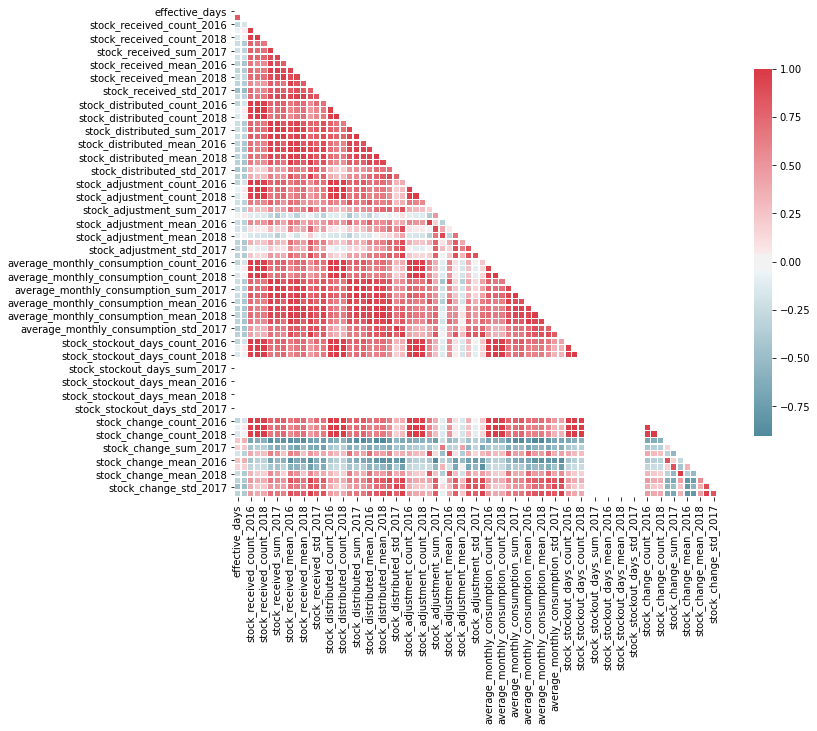

In [175]:
# Compute the correlation matrix
# log transform metrics for analysis
#corr = np.log(standardized_product_df+0.01).corr()
corr = standardized_product_df.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

In [149]:
from sklearn.decomposition import PCA
n_components = len(standardized_product_df) -1
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(standardized_product_df)
principalDf = pd.DataFrame(data = principalComponents , columns = ["comp_"+str(x) for x in  range(n_components)])

<AxesSubplot:xlabel='comp_0', ylabel='comp_1'>

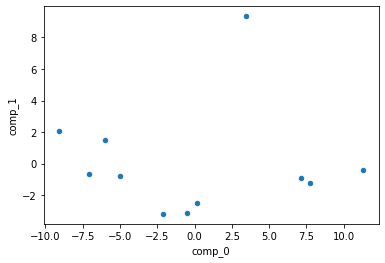

In [150]:
principalDf.plot.scatter(x="comp_0",y="comp_1")

In [158]:
pca_product_df = pd.concat([product_df,principalDf],axis=1)

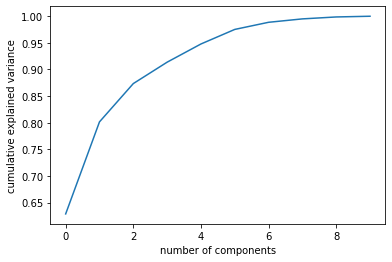

In [151]:
# How much of the variance is explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<AxesSubplot:xlabel='comp_0', ylabel='comp_1'>

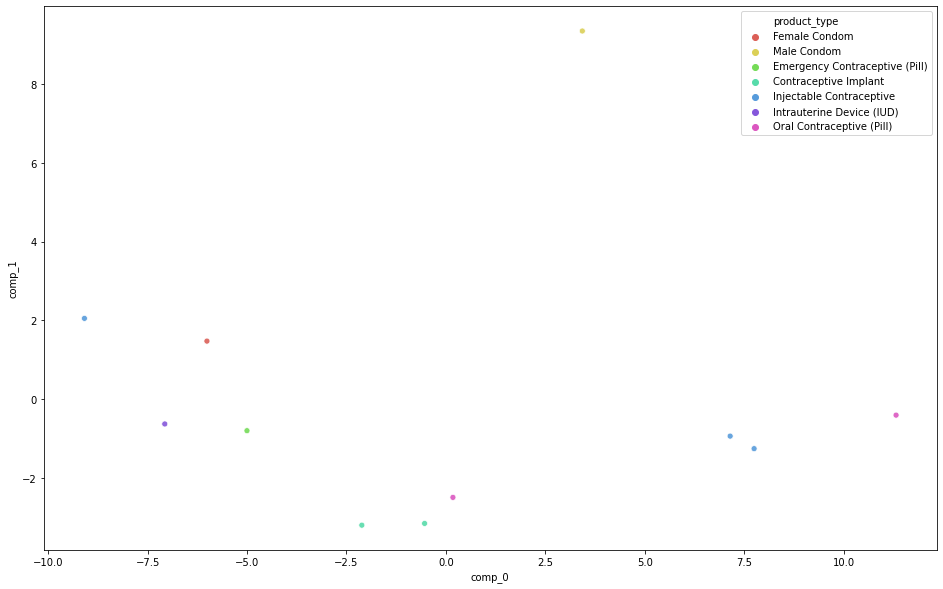

In [162]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="comp_0", y="comp_1",
    hue="product_type",
    palette=sns.color_palette("hls", 7),
    data=pca_product_df,
    legend="full",
    alpha=0.9
)

In [163]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(standardized_product_df)
pca_product_df['tsne_1']= tsne_results[:,0]
pca_product_df['tsne_2'] = tsne_results[:,1]

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 11 samples in 0.001s...
[t-SNE] Computed neighbors for 11 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 11 / 11
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.151306
[t-SNE] KL divergence after 300 iterations: 0.297572


<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

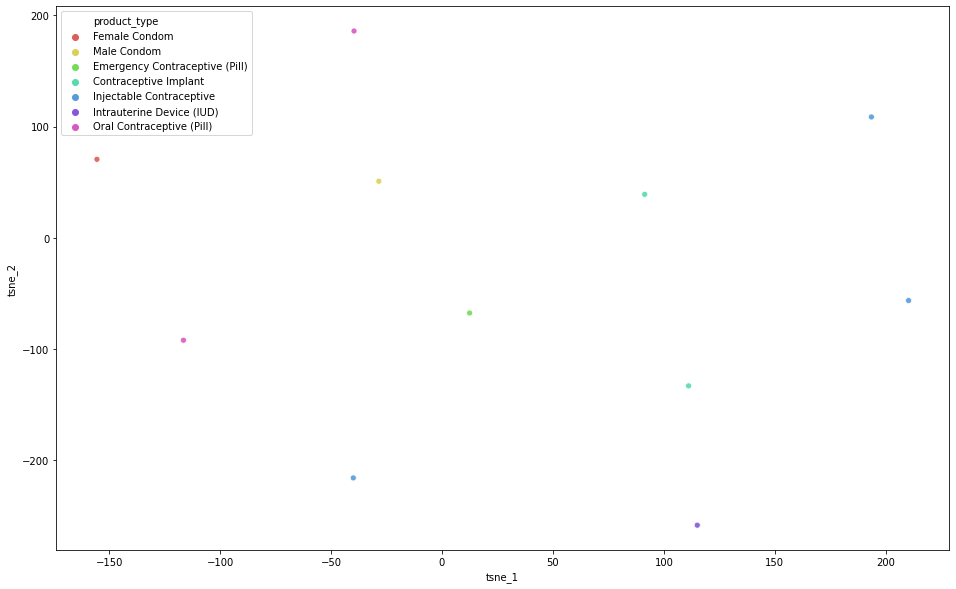

In [164]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="product_type",
    palette=sns.color_palette("hls", 7),
    data=pca_product_df,
    legend="full",
    alpha=0.9
)

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


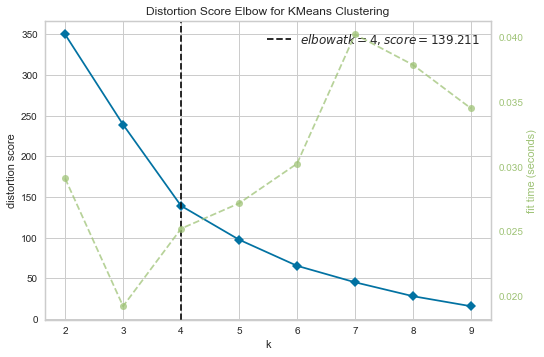

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [176]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer


# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), principalComponents, k=(2,10))

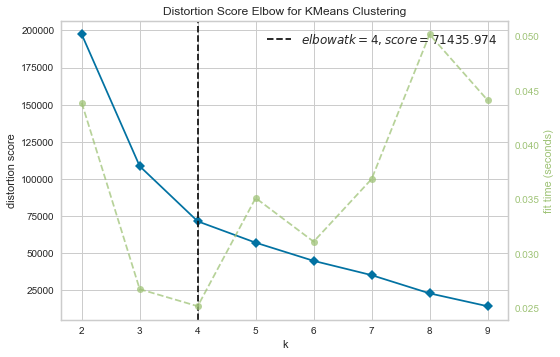

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [181]:
kelbow_visualizer(KMeans(random_state=4), pca_product_df.loc[:,['tsne_1','tsne_2']], k=(2,10))

In [182]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(principalComponents)
product_df['cluster'] =kmeans.fit_predict(principalComponents)
product_df.head()

,product_code,product_type,product_name,effective_days,cyp_per_unit,stock_received_count_2016,stock_received_count_2017,stock_received_count_2018,stock_received_sum_2016,stock_received_sum_2017,...,stock_change_sum_2016,stock_change_sum_2017,stock_change_sum_2018,stock_change_mean_2016,stock_change_mean_2017,stock_change_mean_2018,stock_change_std_2016,stock_change_std_2017,stock_change_std_2018,cluster
0,AS17005,Female Condom,PRESERVATIF FEMININ UNITE,30,0.008333,358.0,357.0,351.0,369.0,1165.0,...,-840.0,1409.0,41.0,-2.346369,3.946779,0.116809,25.540710,85.114166,4.033506,1
1,AS46000,Male Condom,PRESERVATIF MASCULIN BTE/144 BOITE,30,0.008333,496.0,571.0,605.0,12930.0,9014.0,...,-4426.0,-4054.0,2068.0,-8.923387,-7.099825,3.418182,161.783688,177.903055,151.379940,3
2,AS27139,Emergency Contraceptive (Pill),LEVONORGESTREL 1.5 MG CP BOITE,1,0.050000,556.0,694.0,744.0,125.0,2035.0,...,176.0,-1376.0,1306.0,0.316547,-1.982709,1.755376,7.140834,39.278555,18.585349,1
3,AS27137,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE,180,3.800000,975.0,1269.0,1431.0,3469.0,10250.0,...,-397.0,-2637.0,382.0,-0.407179,-2.078014,0.266946,37.382717,55.876845,24.657174,2
4,AS27138,Contraceptive Implant,IMPLANON IMPLANT 68 MG BTE/1 BOITE,180,2.500000,713.0,1170.0,1379.0,3843.0,2929.0,...,-1968.0,1612.0,-3225.0,-2.760168,1.377778,-2.338651,22.549321,14.249068,30.433358,2


In [188]:
product_df.sort_values(by='cluster').loc[:,['product_code','product_type','cluster','cyp_per_unit']]

,product_code,product_type,cluster,cyp_per_unit
6,AS27133,Injectable Contraceptive,0,0.250000
7,AS27134,Injectable Contraceptive,0,0.250000
9,AS27000,Oral Contraceptive (Pill),0,0.066667
0,AS17005,Female Condom,1,0.008333
2,AS27139,Emergency Contraceptive (Pill),1,0.050000
5,AS21126,Injectable Contraceptive,1,0.250000
8,AS42018,Intrauterine Device (IUD),1,4.600000
3,AS27137,Contraceptive Implant,2,3.800000
4,AS27138,Contraceptive Implant,2,2.500000
10,AS27132,Oral Contraceptive (Pill),2,0.066667
